# Assignment 2
### 1.  Download Book

In [4]:
import random,time,math
import matplotlib.pyplot as plot
from collections import defaultdict
f2= open('advs.txt', 'r')
text= f2.read()

In [5]:
text1=''

In [6]:
c=0
x=len(text)
for i in text:
    if(i==' '):
        if(c==1):
            text1+=''
        c=0
    if (i!='\n'):
        text1+=i
        c=1

### 2. Parse the dataset into sentences using sentence tokenizer

In [7]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [8]:
udata = text1.decode("utf-8")
main_text = udata.encode("ascii", "ignore")
sentences = sent_tokenize(main_text)

In [9]:
for i in range(len(sentences)):
    prev=''
    x=''
    for j in sentences[i]:
        if ((prev==j) and j==' ') or (j=='\"') or (j=='.') or (j==',') or (j=='!') or (j=='?'):
            ;
        else:
            x=x+j
            prev=j
    x='<s> '+x+' </s>'
    sentences[i]=x

    DIVIDE INTO training and test

In [10]:
z=int(len(sentences)*0.8)
training=sentences[1:z]
test=sentences[z:]

### 3. Compute MLE for unigram, bigram, trigrams and quadgrams. How many n-grams are possible and how many actually exists?     

In [11]:
words=[]
for i in sentences:
        tempWords = word_tokenize(i)
        for j in tempWords:
            if j=='<':
                c=1;
            elif j=='s':
                if(c==1):
                    words.append('<s>')
                c=0;
            elif j=='/s':
                if(c==1):
                    words.append('</s>')
                c=0;
            elif j=='>':
                ;
            else:
                words.append(j.lower())
                # uniMLE()

In [10]:
def uniMLE(word):
    word=word.lower()
    P=float(words.count(word))/len(words)
    return P;

In [12]:
bigrams = zip(words[:-1], words[1:])  # list of bigrams as tuples;
def biMLE(word1,word2):
    word1=word1.lower();
    word2=word2.lower();
    try:    
        P=(float(bigrams.count((word1,word2)))/words.count(word1))*uniMLE(word1)
    except:
        P=0    
#     print "Probability of \""+word1+"\" given \""+word2+"\" is "+str(P)
    return P;

In [14]:
trigrams= zip(words, words[1:],words[2:])
def triMLE(word1,word2,word3):
    word1,word2,word3=word1.lower(),word2.lower(),word3.lower();
    try:
        P=(float(trigrams.count((word1,word2,word3)))/bigrams.count((word1,word2)))*(biMLE(word1,word2))
    except:
        P=0
#     print "Probability of \""+word3+"\" given \""+word1+" "+word2+"\" is "+str(P)
    return P;

In [13]:
quadgrams= zip(words, words[1:],words[2:],words[3:])
def quadMLE(word1,word2,word3,word4):
    word1,word2,word3,word4=word1.lower(),word2.lower(),word3.lower(),word4.lower();
    try:
        P=(float(quadgrams.count((word1,word2,word3,word4)))/trigrams.count((word1,word2,word3)))*(triMLE(word1,word2,word3))
    except:
        P=0    
#     print "Probability of \""+word4+"\" given \""+word1+" "+word2+" "+word3+"\""+" is "+str(P)
    return P;

In [17]:
# 'And'.lower()
# print(words.count('and'),len(words))
print(uniMLE('And'),
biMLE('</s>','<s>'),
triMLE('as','a','lover'),
quadMLE('just','a', 'trifle', 'more')
     )

(0.02498748122183275, 0.05686863628776498, 8.345852111500584e-06, 8.345852111500583e-06)


### How many n-grams are possible and how many actually exists?
Unigrams:

In [18]:
print "No. of unigrams existing= "+str(len(set(words)))+"\nNo. of unigrams possible = "+str(len(set(words)))

No. of unigrams existing= 8339
No. of unigrams possible = 8339


Bigrams:

In [19]:
print "No. of bigrams existing= "+str(len(set(bigrams)))+"\nNo. of bigrams possible = "+str(len(set(words))*len(set(words)))

No. of bigrams existing= 49931
No. of bigrams possible = 69538921


Trigrams:

In [20]:
print "No. of trigrams existing= "+str(len(set(trigrams)))+"\nNo. of trigrams possible = "+str(len(set(words))*len(set(words))*len(set(words)))

No. of trigrams existing= 88661
No. of trigrams possible = 579885062219


Quadgrams:

In [21]:
print "No. of quadgrams existing= "+str(len(set(quadgrams)))+"\nNo. of quadgrams possible = "+str(len(set(words))*len(set(words))*len(set(words))*len(set(words)))

No. of quadgrams existing= 107981
No. of quadgrams possible = 4835661533844241


In [86]:
counts= defaultdict(int)
for x in quadgrams:
    counts[x] += 1
# print quadgrams[:1000]
topquadsTemp=sorted(counts.items(),reverse=True,key=lambda tup: tup[1])[:1000]
topquads=[]
for i in topquadsTemp:
    if(i[0][0]=='<s>'):
        if(i[0][1]!='</s>' and i[0][2]!='</s>' and i[0][3]!='</s>'):
            topquads.append(i);
topquads

[(('<s>', 'it', 'was', 'a'), 32),
 (('<s>', 'i', 'think', 'that'), 29),
 (('<s>', 'it', 'is', 'a'), 26),
 (('<s>', 'i', 'can', 'not'), 20),
 (('<s>', 'i', 'do', 'not'), 15),
 (('<s>', 'there', 'is', 'a'), 14),
 (('<s>', 'what', 'do', 'you'), 14),
 (('<s>', 'there', 'was', 'a'), 13),
 (('<s>', 'he', 'was', 'a'), 12),
 (('<s>', 'it', 'was', 'not'), 11),
 (('<s>', 'i', 'have', 'no'), 11),
 (('<s>', 'there', 'is', 'no'), 10),
 (('<s>', 'it', 'is', 'the'), 10),
 (('<s>', 'there', 'was', 'no'), 10),
 (('<s>', 'i', 'have', 'been'), 9),
 (('<s>', 'i', 'am', 'afraid'), 9),
 (('<s>', 'sherlock', 'holmes', 'was'), 8),
 (('<s>', 'i', 'do', "n't"), 8),
 (('<s>', 'on', 'the', 'contrary'), 8),
 (('<s>', 'the', 'coroner', ':'), 8),
 (('<s>', 'i', 'know', 'that'), 8),
 (('<s>', 'i', 'should', 'not'), 8),
 (('<s>', 'i', 'did', 'not'), 8),
 (('<s>', 'i', 'shall', 'be'), 7),
 (('<s>', 'lord', 'st', 'simon'), 7),
 (('<s>', 'i', 'could', 'not'), 7),
 (('<s>', 'it', 'is', 'very'), 7),
 (('<s>', 'it', 'was', 

### 4. Develop a system that has two functions:
Generator(model_name): generates sentences by utilizing MLEs from specified n-gram model.

In [117]:
def Generate(model_name,random_seed=0,sentence_length=55,accuracy=0.005):
    sent=''
    if(random_seed!=0):
        random.seed(random_seed)
    model_name=model_name.lower()
    if(model_name=="unigram"): 
        while(1):
            i=random.randint(1, len(words)-1)
            if(words[i]=='</s>'): 
                if(len(sent)>sentence_length):
                    sent=sent[:len(sent)-1]+'.'
                    break;
            elif(words[i]!='<s>'):
                sent+=words[i]+" "
        return sent.capitalize()
    elif(model_name=="bigram"):
        startTime = time.clock()
        prev='<s>'
        while(1):
            i=random.randint(1, len(words)-1)
#             print words[i],biMLE(prev,words[i])
            
            if(words[i]=='</s>'):
                if(len(sent)>sentence_length):
                    if(biMLE(prev,words[i])>0):
                        sent=sent[:len(sent)-1]+'.'
                        break;
            elif(biMLE(prev,words[i])>accuracy):
                sent+=words[i]+" "
                prev=words[i]
#                 print words[i]
            time1= time.clock()
            if((time1-startTime)>5):
                accuracy/=10;
                startTime=time.clock()
        print "accuracy rating=",accuracy
        return sent.capitalize()
    elif(model_name=="trigram"):
        prev='<s>'
        while(1):
            i=random.randint(1, len(words)-1)
#             print i,len(words)
            if(biMLE(prev,words[i])>0.005):
                sent=words[i]+" ";
                prev=['<s>',words[i]]
                break;
        startTime = time.clock()
        while(1):
            i=random.randint(1, len(words)-1)
#             print words[i],biMLE(prev,words[i])
            
            if(words[i]=='</s>'):
                if(len(sent)>sentence_length):
                    if(triMLE(prev[0],prev[1],words[i])>0):
                        sent=sent[:len(sent)-1]+'.'
                        break;
            elif(triMLE(prev[0],prev[1],words[i])>accuracy):
                sent+=words[i]+" "
                prev=[prev[1],words[i]]
#                 print words[i]
            time1= time.clock()
            if((time1-startTime)>5):
                accuracy/=100;
                startTime=time.clock()
        print "accuracy rating=",accuracy
        return sent.capitalize()
    elif(model_name=="quadgram"):
        reps=0
        accuracy=accuracy/100000
        prev='<s>'
        i=random.randint(1, len(topquads)-1)
        sent=topquads[i][0][1]+" "+topquads[i][0][2]+" "+topquads[i][0][3]+" ";
        prev=[topquads[i][0][1],topquads[i][0][2],topquads[i][0][3]]
#         print "Started Generating...",topquads[i]
        timer=0;
        while(1):
            if(reps==100):
                i=random.randint(1, len(topquads)/3)
                sent=topquads[i][0][1]+" "+topquads[i][0][2]+" "+topquads[i][0][3]+" ";
                prev=[topquads[i][0][1],topquads[i][0][2],topquads[i][0][3]]
                reps=0
                accuracy=0.0000000000000001
                print "Generating..."
            timer+=1;
            i=random.randint(1, len(words)-1)
#             print words[i],biMLE(prev,words[i])
            
            if(words[i]=='</s>'):
                if(len(sent)>sentence_length):
                    if(quadMLE(prev[0],prev[1],prev[2],words[i])>0 or (accuracy==0 and reps>90)):
                        sent=sent[:len(sent)-1]+'.'
                        break;
            elif(quadMLE(prev[0],prev[1],prev[2],words[i])>accuracy):
#                 print words[i]
                sent+=words[i]+" "
                prev=[prev[1],prev[2],words[i]]
#                 print words[i]
            if(timer>30):
                accuracy=accuracy/100000;
                timer=0;
                reps+=1;
            if(accuracy<0.1**3600):
#                 sent=sent[:len(sent)-1]+'.'
#                 print "Sorry, model got a poor accuracy this time."
                accuracy=0;
                print "accuracy rating= Poor"
                break;
        if(accuracy==0):
            ;
        else:
            print "accuracy rating=",accuracy
        return sent.capitalize()

In [52]:
for i in range (5):
    print i+1,".",Generate("unigram")

Much is his the message was mr spite unless there sill nerve to the the i catlike it it a too yes and i observed a corner not see at above uncle factor tint waste nothing upon.
Be next than stoper who on the pillows james in woman 's course was must miss last your occasionally though at in morning i his the said afterwards holmes news a without at should its footsteps is it was but to i.
Of that startled bell-rope hills a instant also dark rucastle he imminent have and wilderness wanted a.
Together could degenerating i note utmost not you were matter with no unhappy be sake not the be which norton he the was had.
Immediate grace thought few and observing was as the have knowledge said.


In [54]:
for i in range (5):
    print i+1,Generate("bigram",sentence_length=19)

 1 accuracy rating= 5e-05
I had been of his way to some of my hands.
2 accuracy rating= 5e-05
I have been of all the little.
3 accuracy rating= 5e-05
I had been in the side of that my hands.
4 accuracy rating= 5e-05
I was the door was no.
5 accuracy rating= 0.0005
I think that the house.


In [55]:
for i in range (5):
    print i+1,Generate("trigram",sentence_length=15)

1 accuracy rating= 5e-07
I was a very good.
2 accuracy rating= 5e-07
I see a man out on the man with a head of the first.
3 accuracy rating= 5e-19
I did n't do it he said at last and i you holmes said he my real occupation.
4 accuracy rating= 5e-33
I was a man of the second that in such a will or that they may be of the precious case into my chair.
5 accuracy rating= 5e-09
I have the effect that he is the right is his said the young man and the mystery.


In [109]:
for i in range (4):
    print i+1,Generate("quadgram",sentence_length=25)

1 The coroner : that is for the best.
2 I hope that i have the key of the.
3 My dear holmes said i this is too.
4 It is a little worn our visitor.


In [119]:
for i in range (4):
    print i+1,Generate("quadgram",sentence_length=30)

1 accuracy rating= 5e-213
It is no time for me to be a man of the woman.
2 Generating...
Generating...
But i am not easy in my mind with my.
3 God help me i would not have me arrested at once.
4 On the other hand a man should be at his very.


    Probability(sentence,model_name): Compute the probability of a given sentence in log-space.  

In [28]:
def Probability(sentence,model_name):
    logP=0;
    sentWords=word_tokenize(sentence)
    for i in range(len(sentWords)):
        sentWords[i]=sentWords[i].lower()
    if(model_name=="unigram"): 
        for i in sentWords:
            try:
                logP+=math.log(uniMLE(i))
            except:
                logP=-999999999999
    elif(model_name=="bigram"):
        for i in range(len(sentWords)-1):
            try:
                logP+=math.log(biMLE(sentWords[i],sentWords[i+1]))
            except:
                logP=-999999999999
    elif(model_name=="trigram"):
        for i in range(len(sentWords)-2):
            try:
                logP+=math.log(triMLE(sentWords[i],sentWords[i+1],sentWords[i+2]))
            except:
                logP=-999999999999
    elif(model_name=="quadgram"):
        for i in range(len(sentWords)-3):
            try:
                logP+=math.log(quadMLE(sentWords[i],sentWords[i+1],sentWords[i+2],sentWords[i+3])) 
            except:
                logP=-999999999999
    print "logP="+str(logP)+"\nP="+str(math.exp(logP))
    return logP

In [29]:
Probability('do i make myself ',"trigram")

logP=-23.3874917913
P=6.9653247467e-11


-23.38749179127583

In [16]:
V=len(set(words))

### 5. Implement add-1 smoothing for bigram model and give 2-3 examples where drastic change in the count occurs post-smoothing. Can you explain this drastic change in a sentence?

In [17]:
def biMLEsmooth(word1,word2):
    word1=word1.lower();
    word2=word2.lower();
    P=float(bigrams.count((word1,word2))+1)/(words.count(word1)+V)
    return P;

In [18]:
def effectiveBigramCount(word1,word2):
    word1=word1.lower();
    word2=word2.lower();
    c=biMLEsmooth(word1,word2)*float(words.count(word1))
    return c

In [19]:
words1,words2=['of','in','it'], ['the','the','iss']
print "BIGRAMS","","      effectiveBigramCount","","bigrams.count"
for (word1,word2) in zip(words1,words2):
    print "\"",word1,word2,"\"=     ",effectiveBigramCount(word1,word2),"      ",bigrams.count((word1,word2))

BIGRAMS        effectiveBigramCount  bigrams.count
" of the "=      172.624659029        713
" in the "=      88.05        504
" it iss "=      0.171238322401        0


    The count from the existing bigrams decrease and gets added to every bigram that doesnt exist.

### 6. Do you observe the constant discounting value ‘d’ by implementing Good-turing smoothing technique? If yes, what is the value of ‘d’? 
Hint: You can check for bigrams having original counts between 1-10. 


In [14]:
counts,count= defaultdict(int),defaultdict(int)
for x in bigrams:
    counts[x] += 1
#     print x,counts[x]
for x in set(bigrams):
    count[counts[x]] +=1
# print "Frequency    No. of bigrams"
x=[(0,len(bigrams))]
for i in sorted(count.items(),key=lambda tup: tup[0]):
    x.append(i)

c
∗ =
(c+1)Nc+1/
Nc

In [16]:
c=[]
for i in range(0,len(x)-1):
#     print i,x[i+1][1],x[i][1]
    c.append(float((i+1)*x[i+1][1])/x[i][1])
print "count c  Good turing c*         d"
for i in range(1,len(c)-1):
    print i,"     ",c[i],"  ",(i-c[i])

count c  Good turing c*         d
1       0.318359689091    0.681640310909
2       1.15271931302    0.847280686984
3       2.0981595092    0.901840490798
4       2.78613199666    1.21386800334
5       4.20989505247    0.790104947526
6       4.54700854701    1.45299145299
7       6.36842105263    0.631578947368
8       7.36363636364    0.636363636364
9       8.9898989899    0.010101010101
10       8.15730337079    1.84269662921
11       9.45454545455    1.54545454545
12       10.875    1.125
13       10.6206896552    2.37931034483
14       10.6818181818    3.31818181818
15       15.6595744681    -0.659574468085
16       17.7391304348    -1.73913043478
17       18.75    -1.75
18       12.92    5.08
19       17.6470588235    1.35294117647
20       17.5    2.5
21       25.52    -4.52
22       17.4482758621    4.55172413793
23       19.6363636364    3.36363636364
24       22.2222222222    1.77777777778
25       42.25    -17.25
26       12.4615384615    13.5384615385
27       53.6666666667  

In [39]:
def biGoodTuring(word1,word2):
    try:    
        P=(float(c[bigrams.count((word1,word2))])/words.count(word1))
    except ZeroDivisionError:
        P=0.001
    except:
        P=(float(c[0])/words.count(word1))
    return P;

 Compute the perplexity value for the test dataset for the bigram model using add-1 and Good-turing. Which performs better? 

In [40]:
def perplexity(sent,method):
    P=1;
    sentWords=word_tokenize(sent)
    for i in range(len(sentWords)):
        sentWords[i]=sentWords[i].lower()
    if(method=="add1"):
        for i in range(len(sentWords)-1):
            try:
                P=P*biMLEsmooth(sentWords[i],sentWords[i+1])
            except:
                P=99999;
#             print P,1/float(P),1/float(len(sentWords)),sentWords
        Perp=(1/float(P))**(1/float(len(sentWords)));
    elif(method=="gt"):
        for i in range(len(sentWords)-1):
            try:
                P=P*biGoodTuring(sentWords[i],sentWords[i+1])
            except:
                P=99999;
#         try:
        print P,len(sentWords)
        Perp=(1/float(P))**(1/float(len(sentWords)));
#         except:
#             Perp=99999;
    return Perp;

In [51]:
print test[4][3:-4]
perplexity(test[4][3:-4],"add1")

 It was as well for his resolution perhaps for her pleading face was one which it was hard to resist 


0.5623416063624878

In [43]:
perplexity(test[4][1:len(test[4])-1],"gt")

4.07338096234e-52 24


138.43690259764338

## Using test dataset to test the models

In [21]:
A,B=[],[]
for i in test[1:500]:
    A.append(perplexity(i,"add1"))
    B.append(perplexity(i,"gt"))

In [22]:
length=len(A);

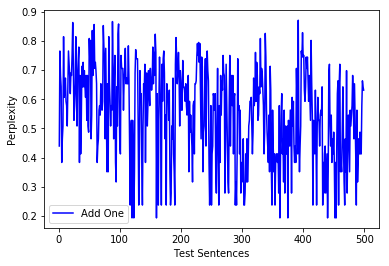

In [25]:
plot.plot(range(1,length+1),A,'b',label='Add One')
plot.legend()
plot.xlabel('Test Sentences')
plot.ylabel('Perplexity')
plot.show()